In [4]:
# requirements
import numpy as npz
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

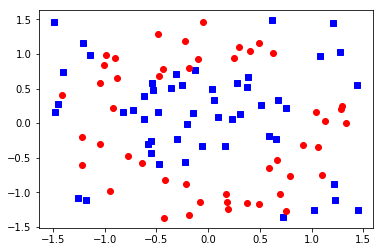

In [ ]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

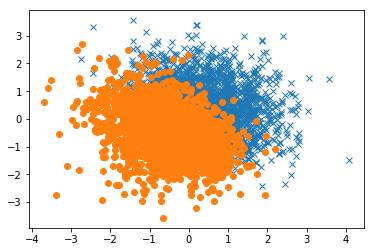

In [ ]:
# dataset 2
n = 4000
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

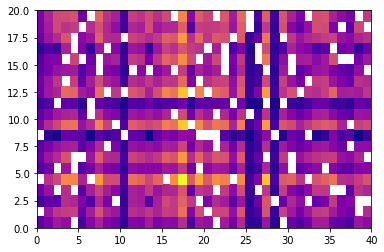

In [ ]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [ ]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1



In [ ]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [ ]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

In [ ]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy


## 1-1

162.30662912222888


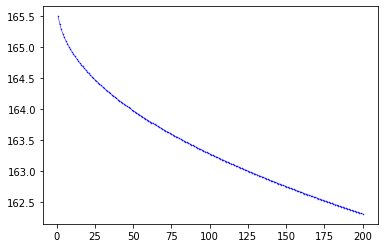

In [ ]:
## gradient discent
loss_hist_batch = [] # to store the history of loss J(w_t)
W = np.array([[3,2,1]])
alpha_base = 1/200
lip = 0.25 * max(x_d4[:,0]**2);
lam = 0.01
y_d4 = y_d4.reshape(200,1)

for t in range(1,n+1):
    posterior = 1 / (1 + np.exp(-y_d4 * (np.dot(x_d4[:,:3],W.T) + x_d4[:, 3:])));
    direction =  1/n * np.add.reduce((1 - posterior) * (y_d4) * x_d4[:,:3]) + 2 * lam * W  
    J = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * (np.dot(x_d4[:,:3],W.T) + x_d4[:,3:])))) + lam * (np.sum(W**2) + 1)
    loss_hist_batch.append(J*n)
    W = W + alpha_base * 1.0 / np.sqrt(t) / lip * direction
print(loss_hist_batch[-1])
plt.plot(range(1,n+1), loss_hist_batch, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')

## 1-2

[165.49709665513603, 115.37205594980855, 93.2906006521736, 82.31543591879056, 76.52852637510289, 73.3398923798139, 71.51996261275454, 70.4465557977237, 69.79223754480168, 69.38057665238631, 69.11418707253219, 68.93765208891035, 68.8183398205393, 68.73638031508914, 68.679307233054, 68.6390983583374, 68.61048132583636, 68.58992972838472, 68.5750498537383, 68.5641961756223, 68.55622494626574, 68.55033336446552, 68.54595295161812, 68.5426779107454, 68.54021642268411, 68.5383571888932, 68.53694623134314, 68.53587066689543, 68.5350472699572, 68.53441435141877, 68.53392595298135, 68.53354767018465, 68.53325362911455, 68.53302428567365, 68.53284481495663, 68.53270392644013, 68.53259298813954, 68.532505376133, 68.53243598929888, 68.53238088575101, 68.53233700933033, 68.53230198303127, 68.5322739523886, 68.53225146630675, 68.53223338605935, 68.53221881556355, 68.5322070477792, 68.532197523373, 68.53218979874309, 68.53218352121068, 68.53217840971682, 68.53217423976076, 68.53217083161611, 68.53216

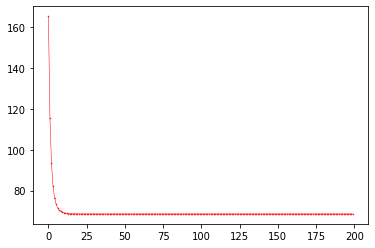

In [ ]:
# newton
loss_hist_newton = [] # to store the history of loss J(w_t)
W = np.array([[3,2,1]])

lam = 0.01
y_d4 = y_d4.reshape(200,1)

for t in range(n):
    posterior = 1 / (1.0 + np.exp(-y_d4 * (np.dot(x_d4[:,:3],W.T) + x_d4[:, 3:])));
    grad = 1 / n * np.add.reduce((1 - posterior) * (-y_d4) * x_d4[:,:3]) + 2 * lam * W  
    mid = np.apply_along_axis(lambda x:  np.dot(np.array([x.tolist()]).T , np.array([x.tolist()])) ,1,x_d4[:,:3])
    po = posterior * (1 - posterior)
    for i in range(len(mid)):
      mid[i] = mid[i] * po[i]
    hess = 1 / n * np.add.reduce(mid)
    hess += 2 * lam
    J = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * (np.dot(x_d4[:,:3],W.T) + x_d4[:,3:])))) + lam * (np.sum(W**2) + 1)
    loss_hist_newton.append(J*n)
    W = W - np.dot(grad,np.linalg.inv(hess)) * 1.0 / np.sqrt(t+10)
    
    
    
print(loss_hist_newton)
plt.plot(range(n), loss_hist_newton,'ro-', linewidth=0.5, markersize=0.5, label='newton')

## 1-3

Text(0, 0.5, 'J(w^t) - J(w^*)')

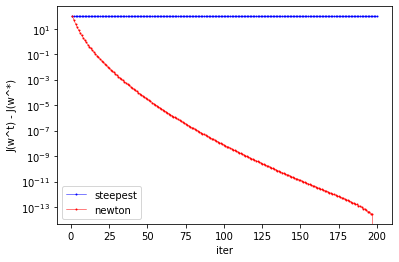

In [ ]:
# plot the result
minloss = min(min(loss_hist_batch),min(loss_hist_newton))
loss_hist_batch = list(map(lambda x:abs(x-minloss),loss_hist_batch))
loss_hist_newton = list(map(lambda x:abs(x-minloss),loss_hist_newton))
plt.plot(range(1,n+1),loss_hist_batch, 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot(range(1,n+1),loss_hist_newton,'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel("J(w^t) - J(w^*)")

# Problem 2

In [7]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

## 2-1

In [ ]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

Text(0, 0.5, '||w(t) − wˆ||')

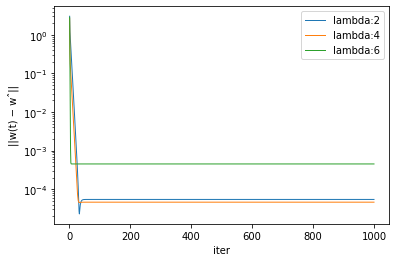

In [ ]:
w_hat_lam = []
lams = np.arange(2, 7, 2)
L = 1.01 * np.max(np.linalg.eig(2 * A)[0])


def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q; 
  return x_proj
w_init = np.array([[ 3],[-1]])
for lam in lams:
  ### implement PG ###

  w_lasso = cv.Variable((2,1))
  obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
  objective = cv.Minimize(obj_fn)
  constraints = []
  prob = cv.Problem(objective, constraints)
  result = prob.solve(solver=cv.CVXOPT) 
  w_lasso = w_lasso.value
  w_hat_lam.append(w_lasso.T)

  w = w_init
  w_hist = []
  for i in range(1000):
    w_hist.append(w.T)
    grad = 2 * np.dot(A, w-mu)
    wth = w - 1/L * grad
    w = st_ops(wth, lam * 1 / L)
  
  for i in range(1000):
    w_hist[i] = w_hist[i]-w_lasso.T
    w_hist[i] = np.sqrt(w_hist[i][0][0] ** 2 + w_hist[i][0][1] ** 2)

  plt.plot(range(1,1000+1),w_hist, linewidth=1, markersize=1, label="lambda:"+str(lam))
  
  
  ###
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel("||w(t) − wˆ||")


## 2-2

[1.000e-03 6.000e-03 1.100e-02 ... 9.986e+00 9.991e+00 9.996e+00]


Text(0, 0.5, 'Optimal value')

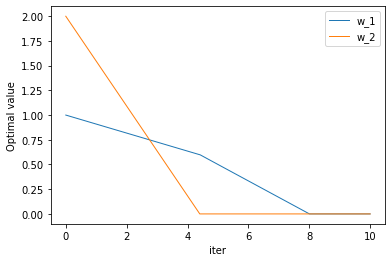

In [ ]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

w_hat_lam = []
lams = np.arange(0.001, 10, 0.005)
L = 1.01 * np.max(np.linalg.eig(2 * A)[0])

for lam in lams:
  w_lasso = cv.Variable((2,1))
  obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
  objective = cv.Minimize(obj_fn)
  constraints = []
  prob = cv.Problem(objective, constraints)
  result = prob.solve(solver=cv.CVXOPT) 
  w_lasso = w_lasso.value
  w_hat_lam.append(w_lasso.T)

w_hatw1 = list(map(lambda x:x[0][0],w_hat_lam))
w_hatw2 = list(map(lambda x:x[0][1],w_hat_lam))
print(lams)
plt.plot(lams,w_hatw1, linewidth=1, markersize=1, label="w_1")
plt.plot(lams,w_hatw2, linewidth=1, markersize=1, label="w_2")

plt.legend()
plt.xlabel('iter')
plt.ylabel("Optimal value")


## 2-3

In [31]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)
x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

In [33]:
import cvxpy as cv
import matplotlib.pyplot as plt

def mldivide(A, b):
  piA = np.linalg.pinv(A)
  x = np.dot(piA, b)
  return x

# run the cell which preparing dataset 6 before run this cell
y = y_d6
x_tilde = x_d6_tilde
w = w_d6
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6

lam = 1.0
wridge = mldivide(np.dot(x_tilde.T, x_tilde) + lam * np.eye(d+1), 
                  np.dot(x_tilde.T, y))

A = np.dot(x_tilde.T, x_tilde) + lam * np.eye(d+1)
mu = np.ones((d+1,1))

# cvx
west = cv.Variable((d+1,1))
obj_fn = \
  0.5 / n * cv.quad_form(x_tilde * west - y, np.eye(x_tilde.shape[0])) + \
  lam * (cv.norm(west[g[0]], 2.0) + \
         cv.norm(west[g[1]], 2.0) + \
         cv.norm(west[g[2]], 2.0) + \
         cv.norm(west[g[3]], 2.0) + \
         cv.norm(west[g[4]], 2.0) )
  
objective = cv.Minimize(obj_fn)
constraints = []

#Group LASSOのProximal Operator
def group_ops(mu, q, g):
  x_proj = np.zeros(mu.shape)
  for i in range(len(g)):
    data = 0
    for j in g[i]:
      data += mu[j]**2
    data = np.sqrt(data)
    for j in g[i]:
      if np.abs(data) > q:
        x_proj[j] = mu[j] - q * mu[j]/data
      else:
        x_proj[j] = 0
  return x_proj


prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)
L = 1.01 * np.max(np.linalg.eig(2 * (np.dot(x_tilde.T, x_tilde)))[0])
w_hist = []
ww = w
print(lam * 1 / L)
for i in range(1000):
  w_hist.append(ww.T)
  grad = 2 * np.dot(A, ww-mu)
  wth = ww - 1/L * grad
  ww = group_ops(wth, lam * 1 / L, g)

  
#print(west.value)
#print(ww)

(0.0006839453950002959+0j)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


## example of group lasso (using dataset 6)

In [15]:
import cvxpy as cv
import matplotlib.pyplot as plt

def mldivide(A, b):
  piA = np.linalg.pinv(A)
  x = np.dot(piA, b)
  return x

# run the cell which preparing dataset 6 before run this cell
y = y_d6
x_tilde = x_d6_tilde
w = w_d6
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6

lam = 1.0
wridge = mldivide(np.dot(x_tilde.T, x_tilde) + lam * np.eye(d+1), 
                  np.dot(x_tilde.T, y))

# cvx
west = cv.Variable((d+1,1))
obj_fn = \
  0.5 / n * cv.quad_form(x_tilde * west - y, np.eye(x_tilde.shape[0])) + \
  lam * (cv.norm(west[g[0]], 2.0) + \
         cv.norm(west[g[1]], 2.0) + \
         cv.norm(west[g[2]], 2.0) + \
         cv.norm(west[g[3]], 2.0) + \
         cv.norm(west[g[4]], 2.0) )
  
objective = cv.Minimize(obj_fn)
constraints = []

prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)


# test
x_test = np.random.randn(n, d)
x_test_tilde = np.hstack([x_test, np.ones((n, 1))])
y_test = np.dot(x_test_tilde, w) + noise * np.random.randn(n, 1)
y_pred = np.dot(x_test_tilde, west.value)


[[-1.46975588e+01]
 [ 4.08389037e+01]
 [ 1.32025949e+01]
 [-2.24050755e+01]
 [ 7.69059279e+00]
 [ 3.19922986e+01]
 [-2.87459106e+01]
 [-9.93245612e+00]
 [ 2.33438765e+01]
 [-1.55445374e+00]
 [-3.12563937e+01]
 [-5.45474079e+01]
 [ 1.24855333e+01]
 [ 4.50356685e+00]
 [ 4.71385093e+00]
 [-5.37745533e+00]
 [ 2.61857662e+01]
 [ 1.20589782e+01]
 [ 3.09247376e+01]
 [-1.28318491e+01]
 [ 4.96208811e+00]
 [ 1.41893166e+00]
 [-1.52194199e+01]
 [-6.27655290e+00]
 [-3.59849171e+01]
 [-2.14887999e+00]
 [-1.25768983e+01]
 [ 2.60382213e+00]
 [ 1.53979779e+01]
 [ 2.70640994e+01]
 [ 3.40629480e+00]
 [ 3.13535391e+01]
 [-9.94768181e+00]
 [ 5.19929195e-01]
 [-4.50368004e+00]
 [-2.04033441e+00]
 [ 9.53583906e+00]
 [-6.22902004e+00]
 [ 1.53277811e+01]
 [ 1.31154461e+01]
 [-4.29699352e+00]
 [-2.13240207e+01]
 [-8.73286673e+00]
 [-1.75906882e+01]
 [ 1.33522957e+01]
 [ 1.70346159e+01]
 [ 1.11336481e+00]
 [ 5.71586911e+00]
 [ 1.63168093e+01]
 [-2.76098673e+01]
 [ 2.22099690e+01]
 [ 1.22701436e+01]
 [-1.3477549

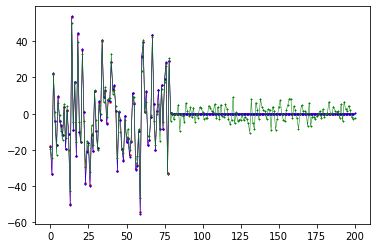

In [ ]:
plt.plot(west.value[0:d], 'r-o', markersize=1.5, linewidth=0.5)
plt.plot(w, 'b-*', markersize=1.5, linewidth=0.5)
plt.plot(wridge, 'g-+', markersize=1.5, linewidth=0.5)

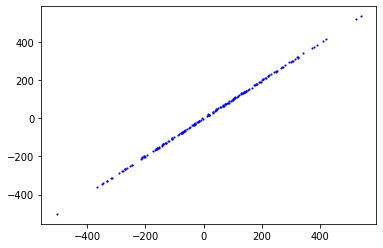

In [ ]:
plt.plot(y_test, y_pred, 'bs', markersize=1)

In [ ]:
print('carinality of w hat: %d'%sum(np.abs(west.value) < 0.01))
print('carinality of w ground truth: %d'%sum(np.abs(w) < 0.01))

carinality of w hat: 120
carinality of w ground truth: 120
